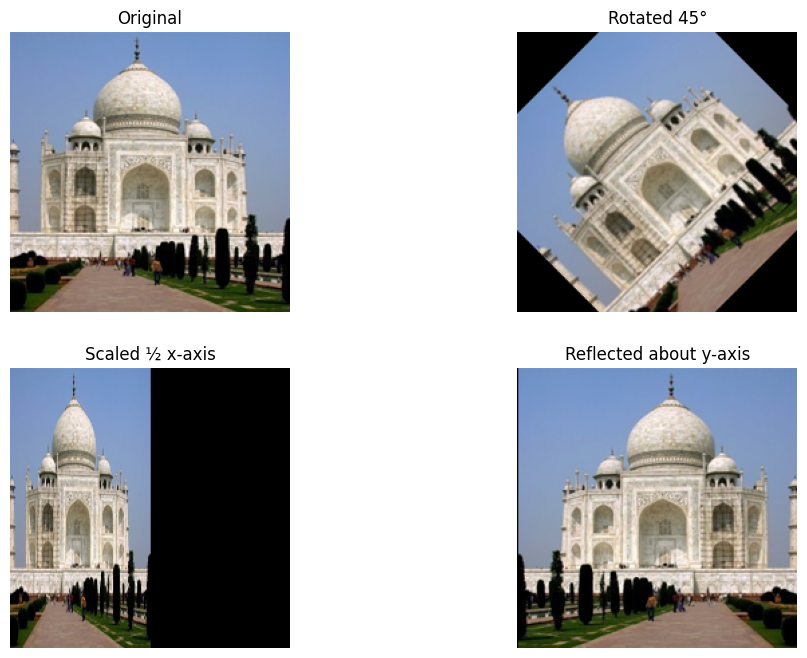

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('Lab2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w = image.shape[:2]
center = (w // 2, h // 2)

M_rotate = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M_rotate, (w, h))
M_scale = np.float32([[0.5, 0, 0],
                      [0, 1, 0]])
scaled = cv2.warpAffine(image, M_scale, (w, h))
M_reflect = np.float32([[-1, 0, w],
                        [0, 1, 0]])
reflected = cv2.warpAffine(image, M_reflect, (w, h))

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Rotated 45°')
plt.imshow(rotated)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Scaled ½ x-axis')
plt.imshow(scaled)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Reflected about y-axis')
plt.imshow(reflected)
plt.axis('off')
plt.show()

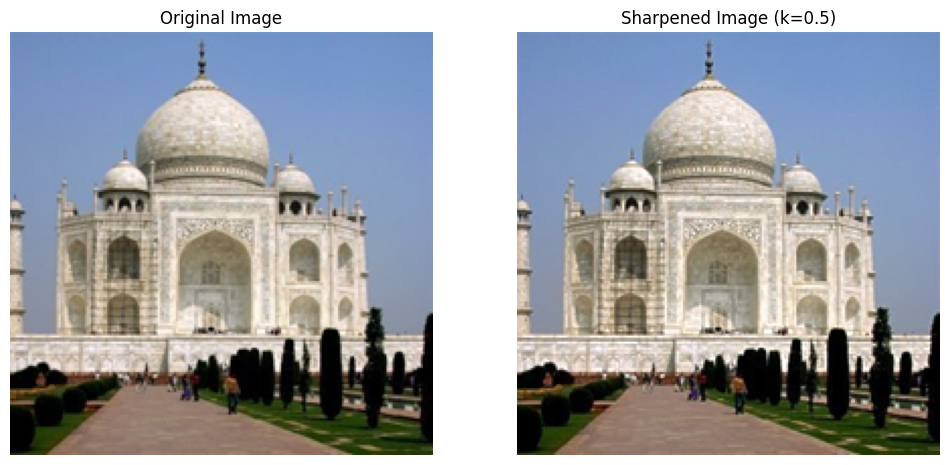

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def sharpen_image(image, k=0.5, kernel_size=(5, 5), sigma=1.0):
    # Apply Gaussian blur
    f_smooth = cv2.GaussianBlur(image, kernel_size, sigma)
    # Calculate g(x, y) = f(x, y) - f_smooth(x, y)
    g = cv2.subtract(image, f_smooth)
    # Calculate fsharp = f + k * g
    f_sharp = cv2.addWeighted(image, 1.0, g, k, 0)
    return f_sharp

image = cv2.imread('Lab2.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Apply sharpening
sharpened_img = sharpen_image(image_rgb, k=0.5, kernel_size=(5,5), sigma=1.0)
# Plot original and sharpened images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Sharpened Image (k=0.5)')
plt.imshow(sharpened_img)
plt.axis('off')
plt.show()

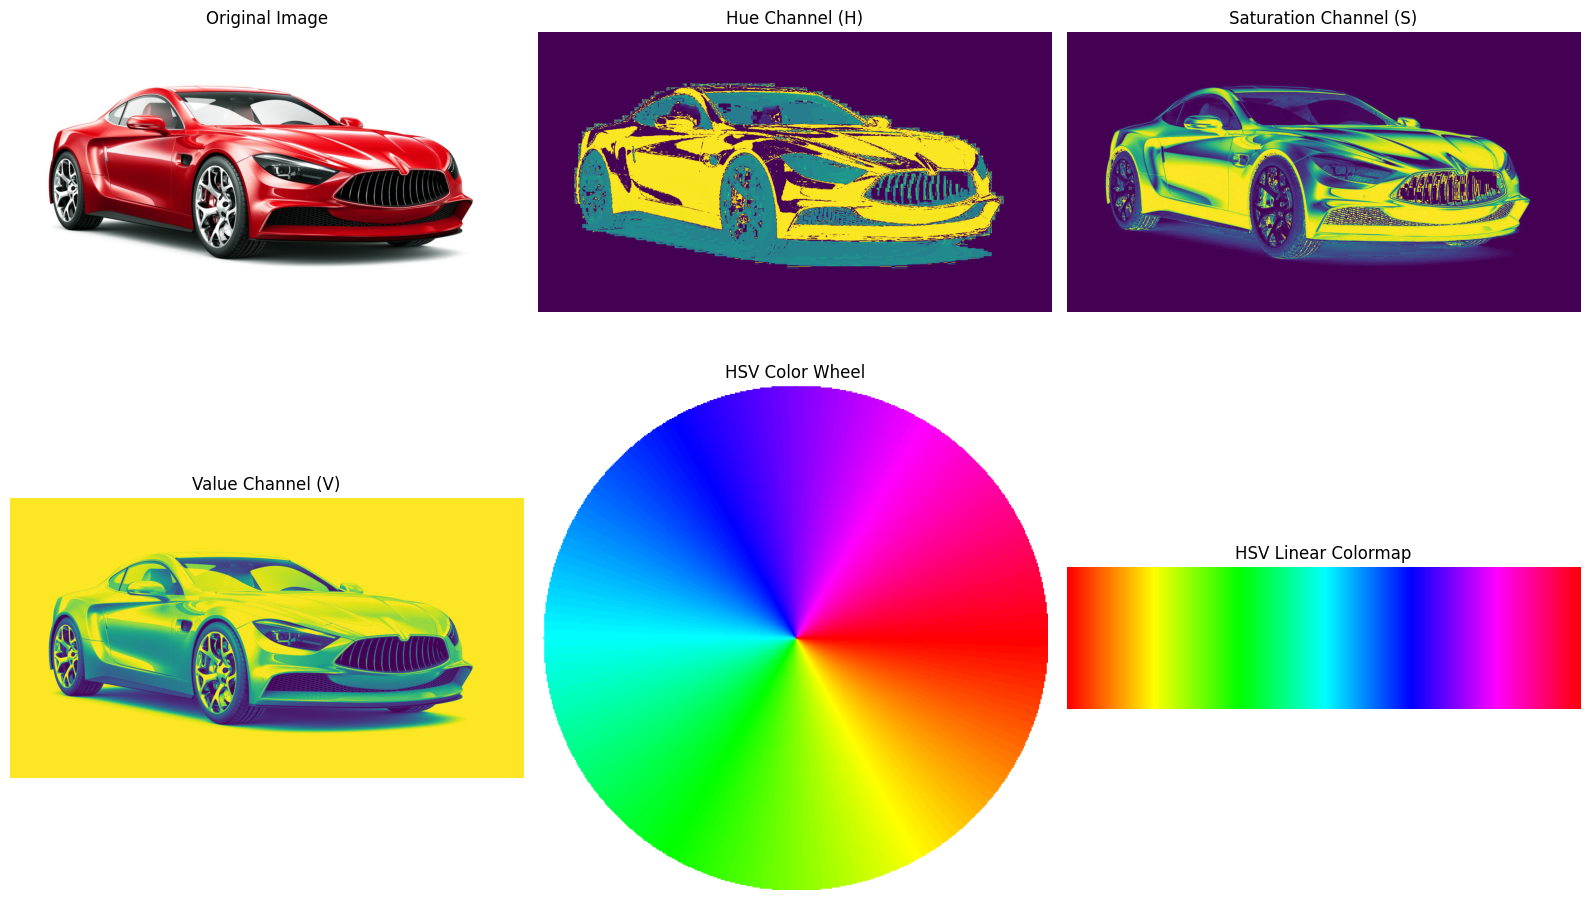

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
size = 400
radius = size // 2
hsv_wheel = np.zeros((size, size, 3), dtype=np.uint8)
for y in range(size):
    for x in range(size):
        dx = x - radius
        dy = y - radius
        distance = np.sqrt(dx**2 + dy**2)
        if distance <= radius:
            angle = (np.degrees(np.arctan2(dy, dx)) + 360) % 360
            hue = int(angle / 2)  # OpenCV Hue 0-179
            hsv_wheel[y, x] = (hue, 255, 255)
        else:
            hsv_wheel[y, x] = (0, 0, 255)

rgb_wheel = cv2.cvtColor(hsv_wheel, cv2.COLOR_HSV2RGB)
hsv_colormap = np.zeros((50, 180, 3), dtype=np.uint8)
for i in range(180):
    hsv_colormap[:, i] = (i, 255, 255)
colormap_rgb = cv2.cvtColor(hsv_colormap, cv2.COLOR_HSV2RGB)
image_path = '/content/Lab2 car.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_hsv)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
# Original Image
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
# Hue Channel (H)
axs[0, 1].imshow(h, cmap='viridis')
axs[0, 1].set_title('Hue Channel (H)')
axs[0, 1].axis('off')
# Saturation Channel (S)
axs[0, 2].imshow(s, cmap='viridis')  # better for saturation visualization
axs[0, 2].set_title('Saturation Channel (S)')
axs[0, 2].axis('off')
# Value Channel (V)
axs[1, 0].imshow(v, cmap='viridis')  # better for value visualization
axs[1, 0].set_title('Value Channel (V)')
axs[1, 0].axis('off')
# HSV Color Wheel
axs[1, 1].imshow(rgb_wheel)
axs[1, 1].set_title('HSV Color Wheel')
axs[1, 1].axis('off')
# HSV Linear Colormap
axs[1, 2].imshow(colormap_rgb)
axs[1, 2].set_title('HSV Linear Colormap')
axs[1, 2].axis('off')
plt.tight_layout()
plt.show()